<a href="https://colab.research.google.com/github/NouranOuf/diabetes-prediction/blob/main/diabetes_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load CSV File

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Data Cleansing & Feature Selection

In [ ]:
df = df.dropna()
df.drop_duplicates(inplace=True)

# df.drop(df[df['PhysHlth'] > 30].index, inplace = True)
# df.drop(df[df['MentHlth'] > 30].index, inplace = True)
# df.drop(df[((df['CholCheck'] == 0) & (df['HighChol'] == 1))].index, inplace = True)

# df.drop(columns=['Education', 'Income', 'AnyHealthcare', 'NoDocbcCost'], inplace=True)

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

importance = mutual_info_classif(x,y)


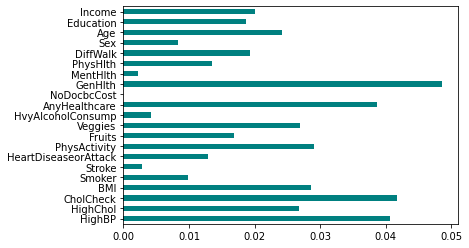

In [ ]:
feat_importance = pd.Series(importance, df.columns[1: len(df.columns)])
feat_importance.plot(kind='barh', color='teal')

In [ ]:
df.drop(columns=['Stroke', 'HvyAlcoholConsump', 'MentHlth', 'NoDocbcCost'], inplace=True)
# multiply by 5 so when we predict w enter the actual age
df.loc[:, 'Age'] *= 5

In [ ]:
df.drop_duplicates(inplace=True)
len(df.index)

216923

Correlation Visualaization

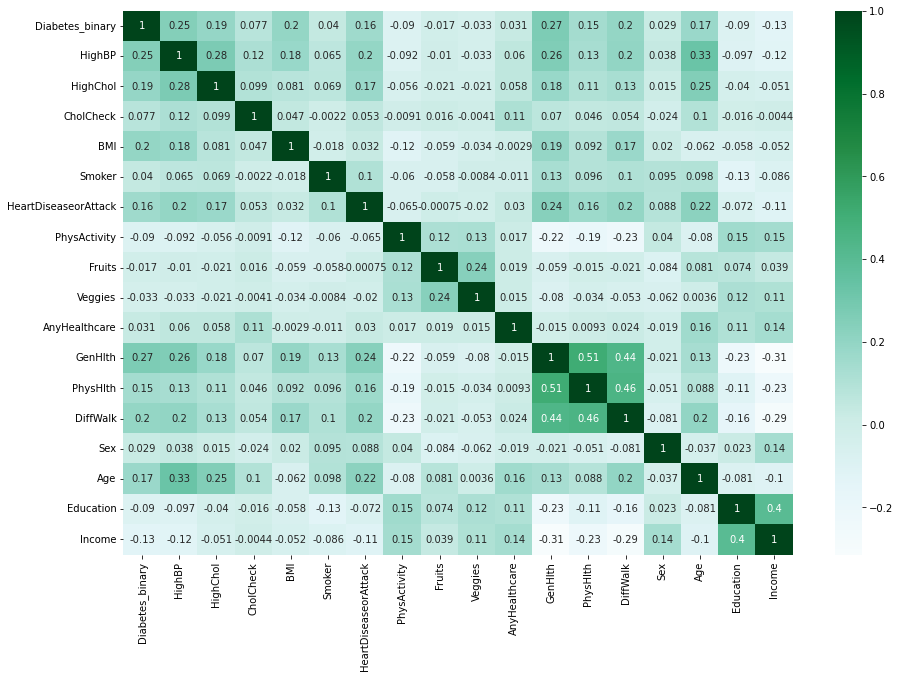

In [ ]:
plt.figure(figsize = (15,10))
cormat = df.corr()
round(cormat,2)

sns.heatmap(cormat, cmap="BuGn", annot=True)

Normalization:

In [ ]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df.columns:
    df[col] = min_max_scaling(df[col])

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,1.0,1.0,1.00,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,1.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,1.0,1.00,1.0,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,1.0,1.0,1.0,1.0,0.25,0.0,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,1.0,1.0,1.0,1.0,0.25,0.0,0.0,0.0,0.833333,0.8,0.428571


Model Training

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:]
y = df.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

Dataset Balancing by oversampling

/Users/macbookpro/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


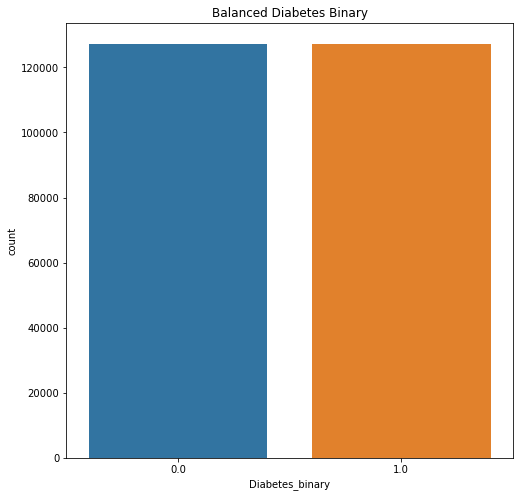

In [ ]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(sampling_strategy='auto', random_state=7)
x_train, y_train = sm.fit_sample(x_train, y_train)


oversampled_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)
oversampled_train.columns = df.columns
plt.figure(figsize=(8, 8))
sns.countplot('Diabetes_binary', data=oversampled_train)
plt.title('Balanced Diabetes Binary')
plt.show()

HeatMap after dataset balance

<AxesSubplot:>

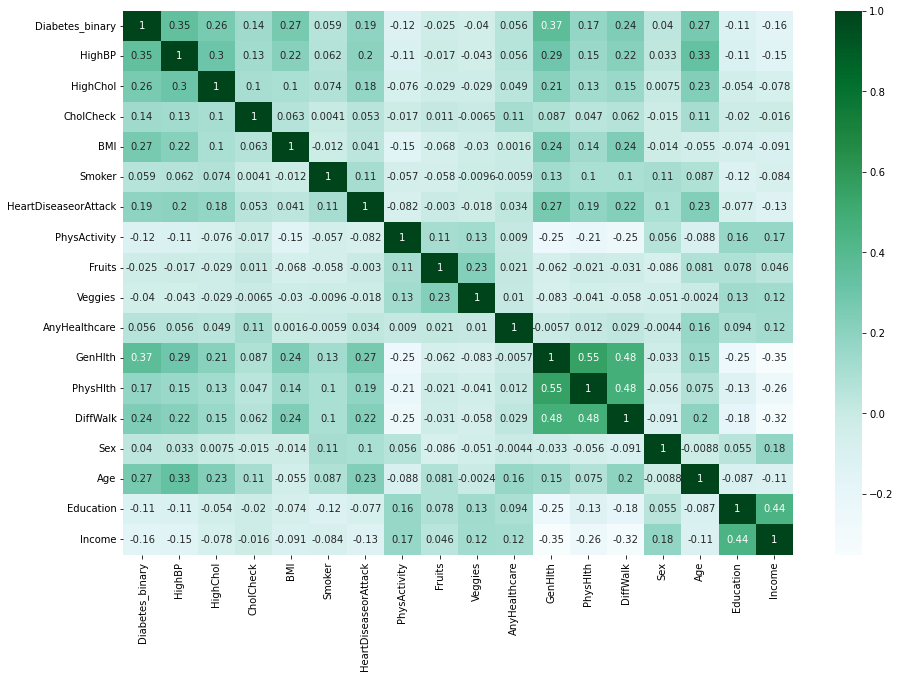

In [ ]:
plt.figure(figsize = (15,10))
cormat = oversampled_train.corr()
round(cormat,2)

sns.heatmap(cormat, cmap="BuGn", annot=True)

In [ ]:
# Model Evaluation
def model_evaluation(y_pred, test_y):
  print("Accuracy:", metrics.accuracy_score(test_y, y_pred))
  print("Precision:", metrics.precision_score(test_y, y_pred))
  print("F1 Score:", metrics.f1_score(test_y, y_pred))
  print("Confusion Matrix:", metrics.confusion_matrix(test_y, y_pred))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from matplotlib import pyplot

logModel = LogisticRegression(max_iter=10000)
logModel.fit(x_train, y_train)

joblib.dump(logModel, "logistic_regreession.pkl")

['logistic_regreession.pkl']

In [ ]:
logModelLoaded = joblib.load("logistic_regreession.pkl")

logy_pred = logModelLoaded.predict(x_test)
model_evaluation(logy_pred, y_test)

Accuracy: 0.7078230403982974
Precision: 0.32051282051282054
F1 Score: 0.44749229964549314
Confusion Matrix: [[38363 16324]
 [ 2690  7700]]


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
joblib.dump(rfc, "random_forest_classifier.pkl")

['random_forest_classifier.pkl']

In [ ]:
rfcModelLoaded = joblib.load("random_forest_classifier.pkl")

rfcy_pred = rfcModelLoaded.predict(x_test)
model_evaluation(rfcy_pred, y_test)

Accuracy: 0.8198288181692457
Precision: 0.4044927743597081
F1 Score: 0.325335174636055
Confusion Matrix: [[50525  4162]
 [ 7563  2827]]


SVM

In [ ]:
from sklearn import svm
# oversampling
from imblearn.over_sampling import SMOTE

# kernel='rbf', gamma=0.001, C=10
# svmx_train, svmx_test, svmy_train, svmy_test = train_test_split(x, y, test_size=0.5)
# svmModel = svm.SVC(kernel='linear', verbose=True)
# svmModel.fit(svmx_train, svmy_train)

svmx_train, svmx_test, svmy_train, svmy_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=44)

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=7)
svmx_train, svmy_train = sm.fit_sample(svmx_train, svmy_train)

svmModel = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', verbose=True)
svmModel.fit(svmx_train, svmy_train)
joblib.dump(svmModel, "svm_model.pkl")


[LibSVM].........................................................................................................................................................................................
*..........................................................*.............*
optimization finished, #iter = 256144
obj = -158001.439254, rho = -5.129455
nSV = 158051, nBSV = 157989
Total nSV = 158051


['svm_model.pkl']

In [ ]:
import joblib

svmx_train, svmx_test, svmy_train, svmy_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=44)
svmModelLoaded = joblib.load("svm_model.pkl")

svm_pred = svmModelLoaded.predict(svmx_test)
model_evaluation(svm_pred, svmy_test)

Accuracy: 0.6937935061542481
Precision: 0.31380720239031296
F1 Score: 0.44479117327463713
Confusion Matrix: [[37168 17454]
 [ 2473  7982]]


Decision Tree

In [ ]:
from sklearn import tree

treeModel = tree.DecisionTreeClassifier()
treeModel = treeModel.fit(x_train, y_train)

joblib.dump(treeModel, "decision_tree_model.pkl")


['decision_tree_model.pkl']

In [ ]:
import joblib

treeModelLoaded = joblib.load("decision_tree_model.pkl")


tree_pred = treeModelLoaded.predict(x_test)
model_evaluation(tree_pred, y_test)

Accuracy: 0.7588395285584769
Precision: 0.2768803634528016
F1 Score: 0.2954749506195008
Confusion Matrix: [[46092  8595]
 [ 7099  3291]]


Test The Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# pd.DataFrame([{'HighBP': 1.0, 'HighChol': 1.0, 'CholCheck': 1.0, 'BMI': 40.0, 'Smoker': 1.0, 'Stroke': 0.0, 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 0.0, 'Fruits': 0.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 0.0, 'GenHlth': 5.0, 'MentHlth': 18.0, 'PhysHlth': 15.0, 'DiffWalk': 1.0, 'Sex': 0.0, 'Age': 45.0}])
# Calculate min max scale for normalization of new data
df2 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df2 = df2.dropna()
df2.drop_duplicates(inplace=True)

# df2.drop(columns=['Education', 'Income', 'AnyHealthcare', 'NoDocbcCost'], inplace=True)
df2.drop(columns=['Stroke', 'HvyAlcoholConsump', 'MentHlth', 'NoDocbcCost'], inplace=True)
df2.loc[:, 'Age'] *= 5

df2.drop_duplicates(inplace=True)
# Diabetes_binary          0.0
# HighBP                   1.0
# HighChol                 1.0
# CholCheck                1.0
# BMI                     40.0
# Smoker                   1.0
# HeartDiseaseorAttack     0.0
# PhysActivity             0.0
# Fruits                   0.0
# Veggies                  1.0
# AnyHealthcare            1.0
# GenHlth                  5.0
# PhysHlth                15.0
# DiffWalk                 1.0
# Sex                      0.0
# Age                     45.0
# Education                4.0
# Income                   3.0

def min_max_scaling_nd(series, newVal):
    return (newVal - series.min()) / (series.max() - series.min())

print("Diabetes Predection Test:\nEnter 1 for yes and 0 for no \n\n")

print("Do you have high blood pressure?")
HighBP = int(input())
print("Do you have High cholesterol?")
HighChol = int(input())
print("Did you check your Cholestrol Level")
CholCheck = int(input())
print("What is your BMI")
BMI = float(input())
print("Are you a smoker")
Smoker = int(input())
print("Do you have a heart disease or did you have a heart attack?")
HeartDiseaseorAttack = int(input())
print("Do you do any physical activity?")
PhysActivity = int(input())
print("Do you eat fruits?")
Fruits = int(input())
print("Do you eat vegetables?")
Veggies = int(input())
print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?")
AnyHealthcare = int(input())
print("Would you say that in general your health is (scale 1-5) (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor): ")
GenHlth = int(input())
print("how many days during the past 30 days was your mental health not good?")
PhysHlth = int(input())
print("Do you have serious difficulty walking or climbing stairs?")
DiffWalk = int(input())
print("What is your Sex (0 for female and 1 for male)?")
Sex = int(input())
print("What is your Age?")
Age = int(input())
print("What is the highest grade or year of school you completed?")
Education = int(input())
print("Is your annual household income from all sources?")
Income = int(input())

# {'HighBP': 1.0, 'HighChol': 1.0, 'CholCheck': 1.0, 'BMI': 40.0, 'Smoker': 1.0, 'Stroke': 0.0, 
# 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 0.0, 'Fruits': 0.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 0.0, 
# 'GenHlth': 5.0, 'MentHlth': 18.0, 'PhysHlth': 15.0, 'DiffWalk': 1.0, 'Sex': 0.0, 'Age': 45.0}
new_inp = {
    "HighBP": float(HighBP),
    "HighChol": float(HighChol),
    "BMI": float(BMI),
    "CholCheck": float(CholCheck),
    "Smoker": float(Smoker),
    "HeartDiseaseorAttack": float(HeartDiseaseorAttack),
    "PhysActivity": float(PhysActivity),
    "Fruits": float(Fruits),
    "Veggies": float(Veggies),
    "AnyHealthcare": float(AnyHealthcare),
    "GenHlth": float(GenHlth),
    "PhysHlth": float(PhysHlth),
    "DiffWalk": float(DiffWalk),
    "Sex": float(Sex),
    "Age": float(Age),
    "Education": float(Education),
    "Income": float(Income)
}

for col in new_inp:
    new_inp[col] = min_max_scaling_nd(df2[col], new_inp[col])

# print(new_inp)
ldtf = []
for col in df2.columns[1:]:
    ldtf.append(new_inp[col])

new_inp = pd.DataFrame([ldtf], columns=df2.columns[1:])

# new_x_pred = np.array(new_inp.values())
# new_x_pred = new_x_pred.reshape(-1,1)
# new_x_pred = [new_x_pred]

print("Predicted values from different models:")
# Logistic regression
logModelLoaded = joblib.load("logistic_regreession.pkl")
logy_pred = logModelLoaded.predict(new_inp)
print("Logistic Regression: ", logy_pred[0])

# svm
svmModelLoaded = joblib.load("svm_model.pkl")
svm_pred = svmModelLoaded.predict(new_inp)
print("SVM: ", svm_pred[0])

# tree model
treeModelLoaded = joblib.load("decision_tree_model.pkl")
tree_pred = treeModelLoaded.predict(new_inp)
print("Decision Tree: ", tree_pred[0])

# random forest classifier
rfcModelLoaded = joblib.load("random_forest_classifier.pkl")
rfcModelLoaded = treeModelLoaded.predict(new_inp)
print("Random Forest Classifier: ", rfcModelLoaded[0])

Diabetes Predection Test:
Enter 1 for yes and 0 for no 


Do you have high blood pressure?
Do you have High cholesterol?
Did you check your Cholestrol Level
What is your BMI
Are you a smoker
Do you have a heart disease or did you have a heart attack?
Do you do any physical activity?
Do you eat fruits?
Do you eat vegetables?
Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
Would you say that in general your health is (scale 1-5) (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor): 
how many days during the past 30 days was your mental health not good?
Do you have serious difficulty walking or climbing stairs?
What is your Sex (0 for female and 1 for male)?
What is your Age?
What is the highest grade or year of school you completed?
Is your annual household income from all sources?
Predicted values from different models:
Logistic Regression:  1.0
Decision Tree:  0

In [ ]:
# cleaning and feature selection of data if needed
test= pd.read_csv("filename.csv")
test=test.dropna()
test.drop_duplicates(inplace=True)
test.drop(columns=['Education', 'Income', 'AnyHealthcare', 'NoDocbcCost'], inplace=True)
test.loc[:, 'Age'] *= 5
test.drop_duplicates(inplace=True)

#Normalization
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in test.columns:
    test[col] = min_max_scaling(test[col])

# training Model on new data

x_testing = test.iloc[:, 1:]
y_testing = test.iloc[:, 0]

#Logistic Regression
logModelLoaded_test = joblib.load("logistic_regreession.pkl")
logy_pred_test = logModelLoaded_test.predict(x_testing)
print("Model Evaluation for SVM:")
model_evaluation(logy_pred_test, y_testing)

#SVM
svmModelLoaded_test = joblib.load("svm_model.pkl")
svm_pred = svmModelLoaded_test.predict(x_testing)
print("Model Evaluation for SVM:")
model_evaluation(svm_pred, y_testing)


#decision tree
treeModelLoaded_test = joblib.load("decision_tree_model.pkl")
tree_pred_test = treeModelLoaded_test.predict(x_testing)
print("Model Evaluation for SVM:")
model_evaluation(tree_pred_test, y_testing)

